In [1]:
import numpy as np 
import pandas as pd
import os

In [60]:
pip install --upgrade tensorflow sklearn imblearn

Requirement already up-to-date: tensorflow in /usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages (2.3.0)
Requirement already up-to-date: sklearn in /usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages (0.0)
     |████████████████████████████████| 167 kB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.model_selection import train_test_split as tts
from keras.utils import to_categorical #to hot encode the data
from imblearn.under_sampling import RandomUnderSampler

In [46]:
from glob import glob

In [5]:
print(os.listdir("../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/"))

['10253', '10254', '10255', '10256', '10257', '10258', '10259', '10260', '10261', '10262', '10264', '10268', '10269', '10272', '10273', '10274', '10275', '10276', '10277', '10278', '10279', '10282', '10285', '10286', '10288', '10290', '10291', '10292', '10293', '10295', '10299', '10300', '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '12241', '12242', '12626', '12748', '12749', '12750', '12751', '12752', '12810', '12811', '12817', '12818', '12819', '12820', '12821', '12822', '12823', '12824', '12826', '12867', '12868', '12869', '12870', '12871', '12872', '12873', '12875', '12876', '12877', '12878', '12879', '12880', '12881', '12882', '12883', '12884', '12886', '12890', '12891', '12892', '12893', '12894', '12895', '12896', '12897', '12898', '12900', '12901', '12905', '12906', '12907', '12908', '12909', '12910', '12911', '12929', '12930', '12931', '12932', '12933', '12934', '12935', '12947', '12948', '12949', '12951', '12954', '12955', '13018', '13019', '13020', 

In [121]:
dataset_path = "../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/"
patients = os.listdir(dataset_path)
len(patients) 

280

In [10]:
files = glob('../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/**/*', recursive=True)

In [11]:
files

['../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10253',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10254',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10255',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10256',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10257',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10258',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10259',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10260',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10261',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10262',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10264',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10268',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10269',
 '../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10272',
 '../D

In [12]:
print(files[0])

../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/10253


In [13]:
extention=list() 
for image in files:
    ext=image[-3:]
    if ext not in extention:
        extention.append(ext)
alpha_ext=list()
for ex in extention: 
    if ex.isalpha() == True:
        alpha_ext.append(ex)
print(alpha_ext)

['png']


In [14]:
Data = glob('../Downloads/7415_10564_bundle_archive/IDC_regular_ps50_idx5/**/*.png', recursive=True)

In [15]:
print(len(Data))

277524


In [16]:
del(files)

In [19]:
from PIL import Image 
from tqdm import tqdm
dimentions=list()
x=1
for images in (Data):
    dim = Image.open(images)
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>3): 
        break
print(dimentions)

[(50, 50), (41, 50), (50, 37)]


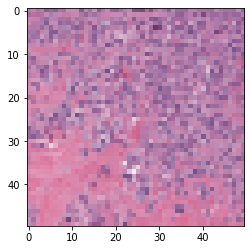

In [126]:
import cv2 
import matplotlib.pyplot as plt 
def display_image(image):
    image_cv = cv2.imread(image) 
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)); 
display_image(Data[52])

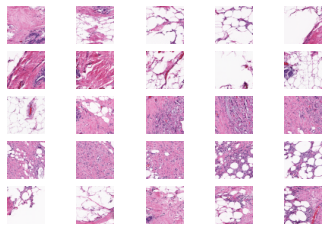

In [30]:
def plot_images(photos) : #to plot multiple image
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

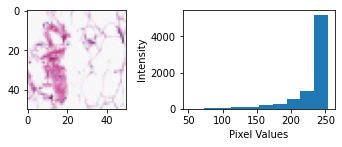

In [31]:
def hist_plot(image): 
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    view_images(image)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
    plt.xlabel('Pixel Values')
    plt.ylabel('Intensity')
hist_plot(Data[29])

In [32]:
from tqdm import tqdm
import csv #to open and write csv files
Data_output=list()
Data_output.append(["Classes"])
for file_name in tqdm(Data):
    Data_output.append([file_name[-10:-4]])
with open("output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])

100%|██████████| 277524/277524 [00:00<00:00, 603107.31it/s]


In [33]:
from IPython.display import display
data_output = pd.read_csv("output.csv")
display(data_output.head(5))
print(data_output.shape)

,Classes
0,class0
1,class0
2,class0
3,class0
4,class0


(277524, 1)


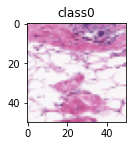

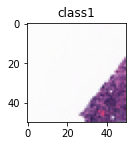

In [34]:
def class_output(images,x,i):  #to display image along with their labels
    fig = plt.figure()
    ax = plt.subplot(2, 2,i)
    ax.set_title(data_output.loc[x].item())
    view_images(images)
    i+=1
    return
k=0 #we have to show only one image of class0 therefore this variable is to check that
l=0 #we have to show only one image of class1 therefore this variable to check that
i=0 #for subplot position
for x in range(1,len(Data)):
    if(data_output.loc[x].item()=="class0" and k!=1):
        k+=1
        i+=1
        class_output(Data[x],x,i)
    elif(data_output.loc[x].item()=="class1" and l!=1):
        l+=1
        i+=1
        class_output(Data[x],x,i)
    elif(k==0 or l==0):
        continue
    else:
        break

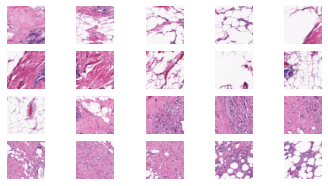

In [35]:
def vis_data(photos,a) :
    x=0
    beta=0
    for image in photos:
        image_cv = cv2.imread(image)
        fig=plt.figure(figsize=(50,50))
        ax=plt.subplot(2, 5, x+1)
        view_images(images)
        x+=1
        beta+=1
plot_images(Data[0:20])

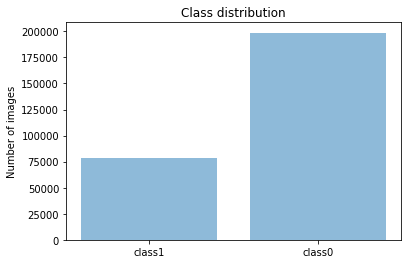

In [36]:
class1 = data_output[(data_output["Classes"]=="class1" )].shape[0]
class0 = data_output[(data_output["Classes"]=="class0" )].shape[0]
objects=["class1","class0"]
y_pos = np.arange(len(objects))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()

In [38]:
percent_class1=class1/len(Data)
percent_class0=class0/len(Data)
print("Total Class1 images :",class1)
print("Total Class0 images :",class0)
print("Percent of class 0 images : ", percent_class0*100)
print("Percent of class 1 images : ", percent_class1*100)

Total Class1 images : 78786
Total Class0 images : 198738
Percent of class 0 images :  71.61110390452717
Percent of class 1 images :  28.388896095472827


In [41]:
from sklearn.utils import shuffle #to shuffle the data
Data,data_output= shuffle(Data,data_output)

In [42]:
from tqdm import tqdm
data=list()
for img in tqdm(Data):
    image_ar = cv2.imread(img)
    data.append(cv2.resize(image_ar,(50,50),interpolation=cv2.INTER_CUBIC))

100%|██████████| 277524/277524 [46:02<00:00, 100.45it/s] 


In [52]:
data_output=data_output.replace(to_replace="class0",value=0)
data_output=data_output.replace(to_replace="class1",value=1)

In [53]:
from keras.utils import to_categorical 
data_output_encoded =to_categorical(data_output, num_classes=2)
print(data_output_encoded.shape)

(277524, 2)


In [58]:
data=np.array(data)
X_train, X_test, Y_train, Y_test = tts(data, data_output_encoded, test_size=0.3)
print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 194266
Number of test files 83258
Number of train_target files 194266
Number of  test_target  files 83258


In [59]:
X_train=X_train[0:70000]
Y_train=Y_train[0:70000]
X_test=X_test[0:30000]
Y_test=Y_test[0:30000]

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


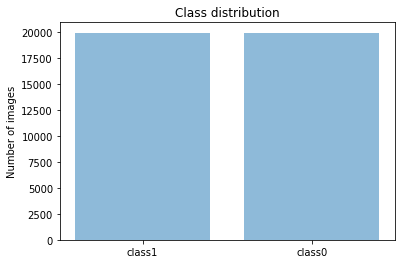

In [66]:
X_train_shape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_shape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_Flat = X_train.reshape(X_train.shape[0], X_train_shape)
X_test_Flat = X_test.reshape(X_test.shape[0], X_test_shape)

random_US = RandomUnderSampler(sampling_strategy='auto')
X_train_RUS, Y_train_RUS = random_US.fit_sample(X_train_Flat, Y_train)
X_test_RUS, Y_test_RUS = random_US.fit_sample(X_test_Flat, Y_test)
del(X_train_Flat,X_test_Flat)

class1=1
class0=0

for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==1):
        class1+=1
for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==0):
        class0+=1
#For Plotting the distribution of classes
classes=["class1","class0"]
y_pos = np.arange(len(classes))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()


#hot encoding them
Y_train_encoded = to_categorical(Y_train_RUS, num_classes = 2)
Y_test_encoded = to_categorical(Y_test_RUS, num_classes = 2)

del(Y_train_RUS,Y_test_RUS)

for i in range(len(X_train_RUS)):
    X_train_RUS_Reshaped = X_train_RUS.reshape(len(X_train_RUS),50,50,3)
del(X_train_RUS)

for i in range(len(X_test_RUS)):
    X_test_RUS_Reshaped = X_test_RUS.reshape(len(X_test_RUS),50,50,3)
del(X_test_RUS)

In [68]:
X_test, X_valid, Y_test, Y_valid = tts(X_test_RUS_Reshaped, Y_test_encoded, test_size=0.2,shuffle=True)

In [69]:
print("Number of train files",len(X_train_RUS_Reshaped))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train_encoded))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_test))
print("Number of  test_target  files",len(Y_test))

Number of train files 39828
Number of valid files 3432
Number of train_target files 39828
Number of  valid_target  files 3432
Number of test files 13724
Number of  test_target  files 13724


In [70]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train_RUS_Reshaped,Y_train_encoded)

In [71]:
display(Y_train_encoded.shape)
display(Y_test.shape)
display(Y_valid.shape)

(39828, 2)

(13724, 2)

(3432, 2)

In [72]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_valid.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_test.shape)

Training Data Shape: (39828, 50, 50, 3)
Validation Data Shape: (3432, 50, 50, 3)
Testing Data Shape: (13724, 50, 50, 3)
Training Label Data Shape: (39828, 2)
Validation Label Data Shape: (3432, 2)
Testing Label Data Shape: (13724, 2)


In [73]:
import itertools 
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [74]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #Import layers for the model
from keras.layers import Dropout, Flatten, Dense 
from keras.models import Sequential #Our model will be Sequential

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(50,50,3)))
model.add(Flatten()) #Flattens the matrix into a vector
model.add(Dense(2, activation='softmax')) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        896       
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 40002     
Total params: 40,898
Trainable params: 40,898
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
from keras.callbacks import ModelCheckpoint  #Checkpoint to save the best weights of the model.
checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True) 
model.fit(X_train, Y_train, 
          validation_data=(X_valid, Y_valid),
          epochs=3, batch_size=128, callbacks=[checkpointer], verbose=2,shuffle=True)

Epoch 1/3

Epoch 00001: val_loss improved from inf to 0.68318, saving model to weights.best.cnn.hdf5
312/312 - 5s - loss: 13.6112 - accuracy: 0.6555 - val_loss: 0.6832 - val_accuracy: 0.7261
Epoch 2/3

Epoch 00002: val_loss improved from 0.68318 to 0.55765, saving model to weights.best.cnn.hdf5
312/312 - 4s - loss: 0.5912 - accuracy: 0.7463 - val_loss: 0.5576 - val_accuracy: 0.7698
Epoch 3/3

Epoch 00003: val_loss did not improve from 0.55765
312/312 - 4s - loss: 0.5134 - accuracy: 0.7707 - val_loss: 0.5630 - val_accuracy: 0.7652


In [77]:
model.load_weights('weights.best.cnn.hdf5')

In [78]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████| 13724/13724 [06:03<00:00, 37.71it/s]


[[5346 1538]
 [1757 5083]]


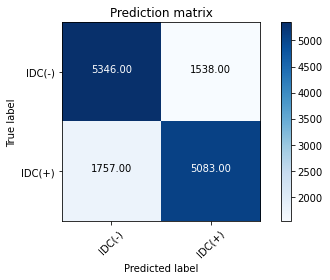

In [122]:
from sklearn.metrics import confusion_matrix #to plot confusion matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_bench=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions))
plot_confusion_matrix(cnf_matrix_bench, classes=class_names,
                      title='Prediction matrix')

In [80]:
from keras.preprocessing.image import ImageDataGenerator  #For Image argumentaton
datagen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        rescale=1/255.0,
        horizontal_flip=True,
        vertical_flip=True)

In [81]:
X_valid_e=X_valid/255.0 #rescaling X_valid
X_test_e=X_test/255.0 #rescaling X_Test

In [82]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

argum_model = Sequential()
argum_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=X_train.shape[1:]))
argum_model.add(Dropout(0.15))
argum_model.add(MaxPooling2D(pool_size=2,strides=2))
argum_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.25))
argum_model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.35))
argum_model.add(Conv2D(filters=512,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
argum_model.add(Dropout(0.45))
argum_model.add(Flatten())
argum_model.add(Dense(2, activation='softmax'))
argum_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)        

In [83]:
argum_model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])

In [84]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.hdf5', verbose=1, save_best_only=True)

In [85]:
batch_size=32
epochs=20
argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer], verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.

Epoch 00001: val_loss improved from inf to 0.69128, saving model to weights.bestarg.hdf5

Epoch 00002: val_loss improved from 0.69128 to 0.69046, saving model to weights.bestarg.hdf5

Epoch 00003: val_loss improved from 0.69046 to 0.68965, saving model to weights.bestarg.hdf5

Epoch 00004: val_loss improved from 0.68965 to 0.68875, saving model to weights.bestarg.hdf5

Epoch 00005: val_loss improved from 0.68875 to 0.68777, saving model to weights.bestarg.hdf5

Epoch 00006: val_loss improved from 0.68777 to 0.68658, saving model to weights.bestarg.hdf5

Epoch 00007: val_loss improved from 0.68658 to 0.68530, saving model to weights.bestarg.hdf5

Epoch 00008: val_loss improved from 0.68530 to 0.68376, saving model to weights.bestarg.hdf5

Epoch 00009: val_loss improved from 0.68376 to 0.68206, saving model to weights.bestarg.hdf5

Epoch 00010: val_loss improved from 0.68206 to 0.68007, saving model to weights.b

In [86]:
batch_size=64
epochs=5
argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer], verbose=0)


Epoch 00001: val_loss improved from 0.63117 to 0.62670, saving model to weights.bestarg.hdf5

Epoch 00002: val_loss improved from 0.62670 to 0.62170, saving model to weights.bestarg.hdf5

Epoch 00003: val_loss improved from 0.62170 to 0.61708, saving model to weights.bestarg.hdf5

Epoch 00004: val_loss improved from 0.61708 to 0.61181, saving model to weights.bestarg.hdf5

Epoch 00005: val_loss improved from 0.61181 to 0.60644, saving model to weights.bestarg.hdf5


In [87]:
argum_model.load_weights('weights.bestarg.hdf5')

In [88]:
predictions_arg = [np.argmax(argum_model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|██████████| 13724/13724 [06:09<00:00, 37.19it/s]


[[4322 2562]
 [1459 5381]]


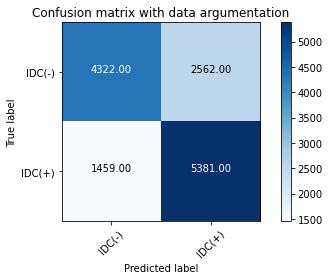

In [89]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_arg))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix with data argumentation')

In [90]:
from keras.applications.vgg19 import VGG19 #downloading model for transfer learning
arg_model = VGG19(include_top=False,weights='imagenet',input_shape=(50,50,3))

80142336/80134624 [==============================] - 2s 0us/step


In [91]:
from keras.applications.vgg19 import preprocess_input #preprocessing the input so that it could work with the downloaded model
bottleneck_train=arg_model.predict(preprocess_input(X_train),batch_size=50,verbose=1) #calculating bottleneck features, this inshure that we hold the weights of bottom layers

797/797 [==============================] - 243s 305ms/step


In [92]:
from keras.applications.vgg19 import preprocess_input
bottleneck_valid=arg_model.predict(preprocess_input(X_valid),batch_size=50,verbose=1)

69/69 [==============================] - 20s 297ms/step


In [93]:
from keras.applications.vgg19 import preprocess_input
bottleneck_test=arg_model.predict(preprocess_input(X_test),batch_size=50,verbose=1)

275/275 [==============================] - 83s 302ms/step


In [94]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=bottleneck_train.shape[1:]))
model_transfer.add(Dense(32,activation='relu'))
model_transfer.add(Dropout(0.15))
model_transfer.add(Dense(64,activation='relu'))
model_transfer.add(Dropout(0.20))
model_transfer.add(Dense(128,activation='relu'))
model_transfer.add(Dropout(0.25))
model_transfer.add(Dense(256,activation='relu'))
model_transfer.add(Dropout(0.35))
model_transfer.add(Dense(512,activation='relu'))
model_transfer.add(Dropout(0.45))

model_transfer.add(Dense(2, activation='softmax'))

model_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [95]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])

In [96]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.tranfer.hdf5', verbose=1, save_best_only=True)

In [97]:
batch_size=32
epochs=20
model_transfer.fit(bottleneck_train, Y_train, batch_size,
          validation_data=(bottleneck_valid, Y_valid),
          epochs=epochs,callbacks=[checkpointer], verbose=1)

Epoch 1/20
1239/1245 [============================>.] - ETA: 0s - loss: 1.3269 - accuracy: 0.4945
Epoch 00001: val_loss improved from inf to 0.71032, saving model to weights.bestarg.tranfer.hdf5
1245/1245 [==============================] - 3s 2ms/step - loss: 1.3271 - accuracy: 0.4943 - val_loss: 0.7103 - val_accuracy: 0.5294
Epoch 2/20
1232/1245 [============================>.] - ETA: 0s - loss: 1.2232 - accuracy: 0.5072
Epoch 00002: val_loss improved from 0.71032 to 0.68693, saving model to weights.bestarg.tranfer.hdf5
1245/1245 [==============================] - 3s 2ms/step - loss: 1.2228 - accuracy: 0.5073 - val_loss: 0.6869 - val_accuracy: 0.5714
Epoch 3/20
1222/1245 [============================>.] - ETA: 0s - loss: 1.1588 - accuracy: 0.5145
Epoch 00003: val_loss improved from 0.68693 to 0.66881, saving model to weights.bestarg.tranfer.hdf5
1245/1245 [==============================] - 2s 2ms/step - loss: 1.1596 - accuracy: 0.5141 - val_loss: 0.6688 - val_accuracy: 0.6031
Epoch 4/

In [98]:
model_transfer.load_weights('weights.bestarg.tranfer.hdf5')

In [99]:
predictions_transfer = [np.argmax(model_transfer.predict(np.expand_dims(feature, axis=0))) for feature in bottleneck_test]

[[4593 2291]
 [1869 4971]]


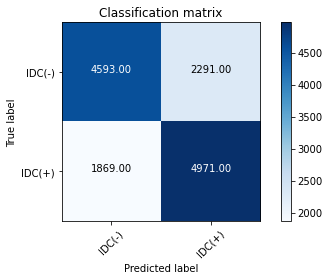

In [123]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_transfer=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_transfer))
plot_confusion_matrix(cnf_matrix_transfer, classes=class_names,
                      title='Classification matrix')

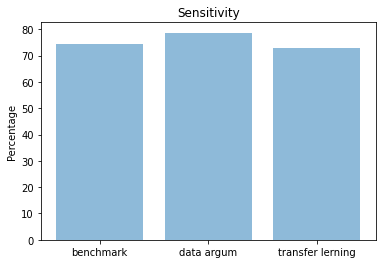

In [102]:
tp=0
for i in range(0,len(Y_test)): #Number of positive cases
    if(np.argmax(Y_test[i])==1):
        tp+=1
#Senstivity of models
confusion_bench_s=cnf_matrix_bench[1][1]/tp *100 
confusion_Arg_s=cnf_matrix_Arg[1][1]/tp *100
confusion_transfer_s=cnf_matrix_transfer[1][1]/tp *100

classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench_s,confusion_Arg_s,confusion_transfer_s]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Sensitivity')

plt.show()

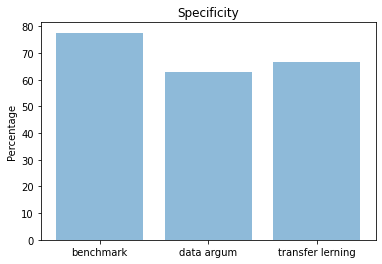

In [103]:
tp=0
tn=0
for i in range(0,len(Y_test)):  #Number of postive cases
    if(np.argmax(Y_test[i])==1): 
        tp+=1
for i in range(0,len(Y_test)): #number of negative cases
    if(np.argmax(Y_test[i])==0):
        tn+=1
confusion_bench=cnf_matrix_bench[0][0]/tn *100
confusion_Arg=cnf_matrix_Arg[0][0]/tn *100
confusion_transfer=cnf_matrix_transfer[0][0]/tn *100
classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench,confusion_Arg,confusion_transfer]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Specificity')

plt.show()

In [104]:
col=['Models','Senstivity','Specificity']
results=pd.DataFrame(columns=col) #dataframe to store the results
results.loc[0]=['Bench',confusion_bench_s,confusion_bench]
results.loc[1]=['Image Arg model',confusion_Arg_s,confusion_Arg]
results.loc[2]=['Transfer Learning model',confusion_transfer_s,confusion_transfer]

In [105]:
display(results)

,Models,Senstivity,Specificity
0,Bench,74.312865,77.658338
1,Image Arg model,78.669591,62.783266
2,Transfer Learning model,72.675439,66.719930


In [106]:
X=np.array(data[0:100000]).astype('float32')/255
print(X.shape[1:])

(50, 50, 3)


In [108]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
def create_model(): #Function to create a network
    argum_model = Sequential()
    print("[INFO] 32 filters")
    argum_model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=X.shape[1:]))
    argum_model.add(Dropout(0.15))
    argum_model.add(MaxPooling2D(pool_size=2,strides=2))
    print("[INFO] 64 filters")
    argum_model.add(Conv2D(filters=64,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.25))
    print("[INFO] 128 filters")
    argum_model.add(Conv2D(filters=128,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.35))
    print("[INFO] 512 filters")
    argum_model.add(Conv2D(filters=512,kernel_size=(3,3),strides=2,padding='same',activation='relu'))
    argum_model.add(Dropout(0.45))
    argum_model.add(Flatten())
    argum_model.add(Dense(2, activation='softmax'))
    argum_model.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])
    return argum_model

In [109]:
from keras.wrappers.scikit_learn import KerasClassifier as ks
from sklearn.model_selection import cross_val_score
cnn = ks(build_fn=create_model,  
         epochs=10, 
         batch_size=100, 
         verbose=0)

In [110]:
cross_val_score(cnn, X, data_output_encoded[0:100000], cv=5)

array([0.71635002, 0.71485001, 0.71820003, 0.71785003, 0.71289998])

In [114]:
results = [0.71635002, 0.71485001, 0.71820003, 0.71785003, 0.71289998]
print(sum(results)/len(results))

0.716030014


In [115]:
def predict_cancer(image):
    predictions_im = [np.argmax(argum_model.predict(np.expand_dims(image,axis=0)))]
    if(predictions_im==1):
        print('[INFO]The Result is - IDC DETECTED ')
    else:
        print('[INFO]The Result is - IDC Negative')

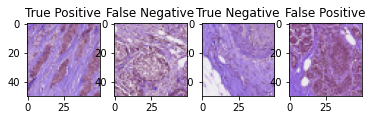

In [116]:
a=0
b=0
c=0
d=0
for i in range(len(X_train)):
    if(np.argmax(Y_train[i])==1 and predictions_arg[i]==1 and a==0):
        a+=1
        img = Image.fromarray(X_train[i])
        ax=plt.subplot(2, 4, 1)
        ax.set_title('[INFO]The Result is - True Positive')
        plt.imshow(img)
        
    if(np.argmax(Y_train[i])==1 and predictions_arg[i]==0 and b==0):
        b+=1
        img = Image.fromarray(X_train[i])
        ax1=plt.subplot(2, 4, 2)
        ax1.set_title('[INFO]The Result is - False Negative')
        plt.imshow(img)
    if(np.argmax(Y_train[i])==0 and predictions_arg[i]==0 and c==0):
        c+=1
        img = Image.fromarray(X_train[i])
        ax2=plt.subplot(2, 4, 3)
        ax2.set_title('[INFO]The Result is - True Negative')
        plt.imshow(img)
    if(np.argmax(Y_train[i])==0 and predictions_arg[i]==1 and d==0):
        d+=1
        img = Image.fromarray(X_train[i])
        ax3=plt.subplot(2, 4, 4)
        ax3.set_title('[INFO]The Result is - False Positive')
        plt.imshow(img)

[INFO]The Result is - IDC Negative
Actual :  ['IDC-']


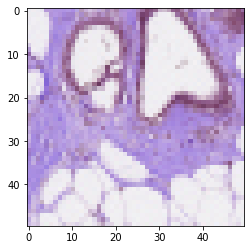

In [118]:
predict_cancer(X_train[820])
img = Image.fromarray(X_train[820])
class_a=['IDC+' if np.argmax(Y_train[820])==1 else 'IDC-']
print('Actual : ',class_a)
plt.imshow(img)